## **Name:** Maira Khan       
## **Email address:** mairak@kth.se

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d
from Functions import *
from Functions import showgrey

# **1.3 Basic Functions**


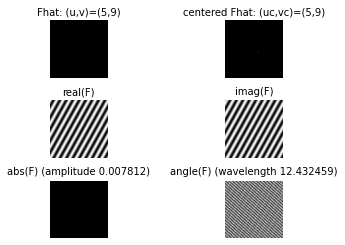

In [25]:
# 1.3 Basic Functions

def fftwave(u,v,sz=128):
    Fhat=np.zeros([sz,sz])
    Fhat[u,v]=1
    F=np.fft.ifft2(Fhat)
    Fabsmax=np.max(np.abs(F))
    
    f=plt.figure()
    f.subplots_adjust(wspace=0.1, hspace=0.4)
    plt.rc('axes',titlesize=10)
    
    a1=f.add_subplot(3,2,1)
    showgrey(Fhat,False)
    a1.title.set_text("Fhat: (u,v)=(%d,%d)"%(u,v))
    
    #What is done by these instructions? Centering
    if u<sz/2:
        uc=u
    else:
        uc=u-sz
    if v<sz/2:
        vc=v
    else:
        vc=v-sz
    
    N=sz
    w1=2*np.pi*(uc/N)
    w2=2*np.pi*(vc/N)
    wavelength = (2*np.pi)/(np.sqrt(w1**2+w2**2))  #0.0   # Replace by correct expression
    amplitude =  np.abs(np.max((1/N)*Fhat))        #0.0    # Replace by correct expression
    
    a2=f.add_subplot(3,2,2)
    showgrey(np.fft.fftshift(Fhat),False) #Shifts the zero-frequency component to the center of spectrum
    a2.title.set_text("centered Fhat: (uc,vc)=(%d,%d)" %(uc,vc))

    a3=f.add_subplot(3,2,3)
    showgrey(np.real(F),False,64,-Fabsmax,Fabsmax)
    a3.title.set_text("real(F)")
    
    a4=f.add_subplot(3,2,4)
    showgrey(np.imag(F),False,64,-Fabsmax,Fabsmax)
    a4.title.set_text("imag(F)")
  
    a5=f.add_subplot(3,2,5)
    showgrey(np.abs(F),False,64,-Fabsmax,Fabsmax)
    a5.title.set_text("abs(F) (amplitude %f)" %amplitude)
    
    a6=f.add_subplot(3,2,6)
    showgrey(np.angle(F),False,64,-Fabsmax,Fabsmax)
    a6.title.set_text("angle(F) (wavelength %f)" %wavelength)
    
    plt.show()
    
#if __name__ == '__main__':
    #p=[5,9,17,17,5,125]
    #q=[9,5,9,121,1,1]
    
    #for i,j in zip(p,q):
        #fftwave(i,j,sz=128)
fftwave(5,9,sz=128)

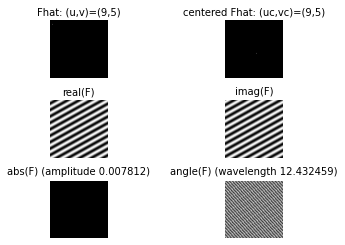

In [26]:
fftwave(9,5,sz=128)

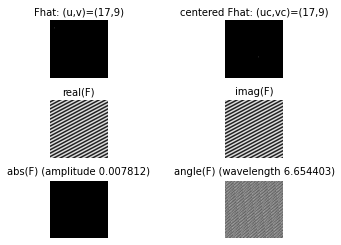

In [27]:
fftwave(17,9,sz=128)

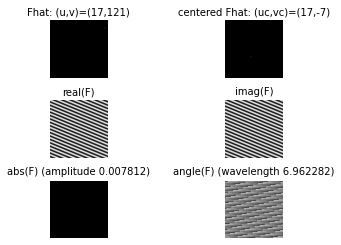

In [28]:
fftwave(17,121,sz=128)

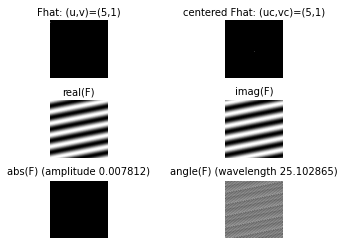

In [29]:
fftwave(5,1,sz=128)

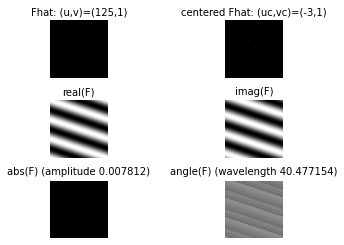

In [30]:
fftwave(125,1,sz=128)

# **1.4 Linearity**

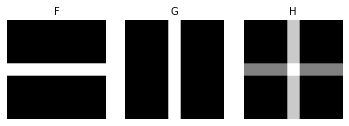

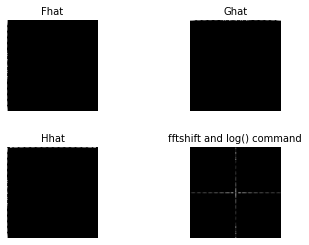

In [3]:
# 1.4 Linearity
           
F= np.concatenate([np.zeros((56,128)),np.ones((16,128)),np.zeros((56,128))])
Fabsmax= np.max(np.abs(F))

G=F.T
H=F + 2*G

f=plt.figure()
f.subplots_adjust(wspace=0.2, hspace=0.4)
plt.rc('axes',titlesize=10)

a1=f.add_subplot(1,3,1)
showgrey(np.log(1+np.abs(F)),False,64,-Fabsmax,Fabsmax)
a1.title.set_text("F")

a2=f.add_subplot(1,3,2)
showgrey(np.log(1+np.abs(G)),False,64,-Fabsmax,Fabsmax)
a2.title.set_text("G")

a3=f.add_subplot(1,3,3)
showgrey(np.log(1+np.abs(H)),False,64,-Fabsmax,Fabsmax)
a3.title.set_text("H")


#Fourier Transform
Fhat=fft2(F)
Ghat=fft2(G)
Hhat=fft2(H)

#Fourier Spectra
g=plt.figure()
g.subplots_adjust(wspace=0.2, hspace=0.4)
plt.rc('axes',titlesize=10)

a4=g.add_subplot(2,2,1)
showgrey(np.log(1+np.abs(Fhat)),False,64,-Fabsmax,Fabsmax)
a4.title.set_text("Fhat")

a5=g.add_subplot(2,2,2)
showgrey(np.log(1+np.abs(Ghat)),False,64,-Fabsmax,Fabsmax)
a5.title.set_text("Ghat")

a6=g.add_subplot(2,2,3)
showgrey(np.log(1+np.abs(Hhat)),False,64,-Fabsmax,Fabsmax)
a6.title.set_text("Hhat")

a7=g.add_subplot(2,2,4)
showgrey(np.log(1+np.abs(fftshift(Hhat))),False,64,-Fabsmax,Fabsmax)
a7.title.set_text("fftshift and log() command")

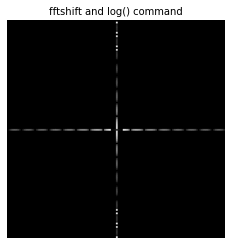

In [4]:
plt.title("fftshift and log() command")
showgrey(np.log(1+np.abs(fftshift(Hhat))),False,64,-Fabsmax,Fabsmax)

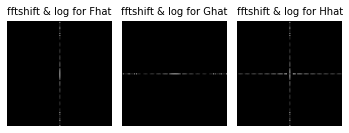

In [5]:
l=plt.figure()
l.subplots_adjust(wspace=0.1, hspace=0.3)
plt.rc('axes',titlesize=10)

a8=l.add_subplot(1,3,1)
showgrey(np.log(1+np.abs(fftshift(Fhat))),False,64,-Fabsmax,Fabsmax)
a8.title.set_text("fftshift & log for Fhat")

a9=l.add_subplot(1,3,2)
showgrey(np.log(1+np.abs(fftshift(Ghat))),False,64,-Fabsmax,Fabsmax)
a9.title.set_text("fftshift & log for Ghat")

a10=l.add_subplot(1,3,3)
showgrey(np.log(1+np.abs(fftshift(Hhat))),False,64,-Fabsmax,Fabsmax)
a10.title.set_text("fftshift & log for Hhat")

# **1.5 Multiplication**

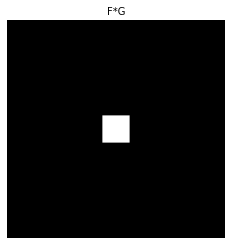

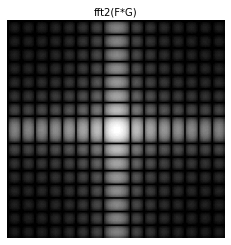

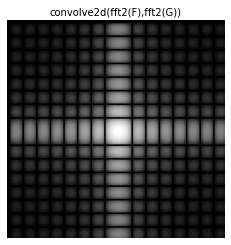

In [6]:
#  1.5 Multiplication

F= np.concatenate([np.zeros((56,128)),np.ones((16,128)),np.zeros((56,128))])
G=F.T

l=plt.figure()
l.subplots_adjust(wspace=0.1, hspace=0.3)
plt.rc('axes',titlesize=10)

#Point-wise Multiplication of Functions
plt.title("F*G")
showgrey(F*G)

# Fourier Transform of Multiplication of Functions
plt.title("fft2(F*G)")
showfs(fft2(F*G))

# Performing Convolution in Spatial domain
plt.title("convolve2d(fft2(F),fft2(G))")
showfs(fftshift(convolve2d(fftshift(fft2(F)/128),fftshift(fft2(G))/128, mode='same')))

# **1.6 Scaling**

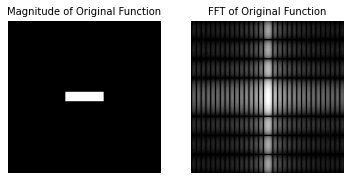

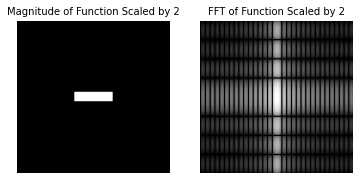

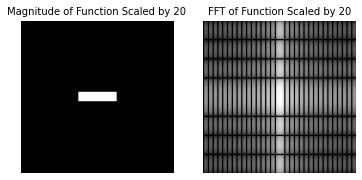

In [7]:
#  1.6 Scaling

F= np.concatenate([np.zeros((60,128)),np.ones((8,128)),np.zeros((60,128))]) *\
    np.concatenate([np.zeros((128,48)),np.ones((128,32)),np.zeros((128,48))],axis=1)

#Display with showgrey()
#Determine Discrete FT and magnitude using showfs()

f=plt.figure()
f.subplots_adjust(wspace=0.2, hspace=0.4)
plt.rc('axes',titlesize=10)

a1=f.add_subplot(1,2,1)
showgrey(F,False)
a1.title.set_text("Magnitude of Original Function")

a2=f.add_subplot(1,2,2)
showfs(fft2(F),False)
a2.title.set_text("FFT of Original Function")    

g=plt.figure()
g.subplots_adjust(wspace=0.2, hspace=0.4)
plt.rc('axes',titlesize=10)

a3=g.add_subplot(1,2,1)
showgrey(2*F,False)
a3.title.set_text("Magnitude of Function Scaled by 2")

a4=g.add_subplot(1,2,2)
showfs(fft2(2*F),False)
a4.title.set_text("FFT of Function Scaled by 2") 

n=plt.figure()
n.subplots_adjust(wspace=0.2, hspace=0.4)
plt.rc('axes',titlesize=10)

a5=n.add_subplot(1,2,1)
showgrey(20*F,False)
a5.title.set_text("Magnitude of Function Scaled by 20")

a6=n.add_subplot(1,2,2)
showfs(fft2(20*F),False)
a6.title.set_text("FFT of Function Scaled by 20") 

# **1.7 Rotation**

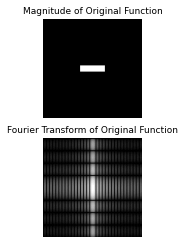

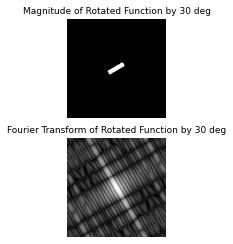

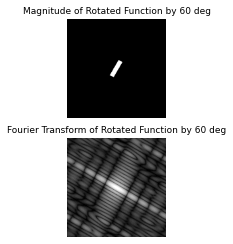

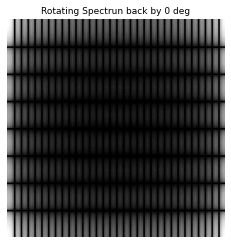

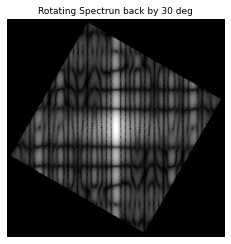

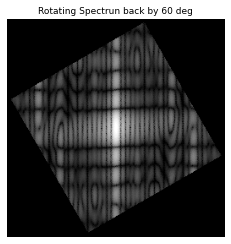

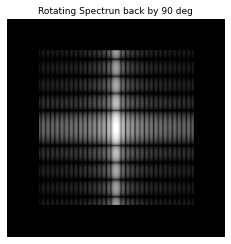

In [8]:
#  1.7 Rotation

alpha=30
F= np.concatenate([np.zeros((60,128)),np.ones((8,128)),np.zeros((60,128))]) *\
    np.concatenate([np.zeros((128,48)),np.ones((128,32)),np.zeros((128,48))],axis=1)

plt.subplot(2,1,1)
showgrey(F,False)
plt.title("Magnitude of Original Function",fontsize=9)

plt.subplot(2,1,2)
plt.title("Fourier Transform of Original Function",fontsize=9)
showfs(fft2(F))

G = rot(F,alpha) # Rotated image
Ghat= fft2(G)  # Fourier Transform of rotated image
Hhat=rot(fftshift(Ghat),-alpha) #Rotate the spectrum back by the same angle

plt.subplot(2,1,1)
showgrey(G,False)
plt.title("Magnitude of Rotated Function by 30 deg",fontsize=9)

plt.subplot(2,1,2)
plt.title("Fourier Transform of Rotated Function by 30 deg",fontsize=9)
showfs(Ghat)

GG = rot(F,60) # Rotated image
GGhat= fft2(GG)  # Fourier Transform of rotated image
HHhat=rot(fftshift(GGhat),-60) #Rotate the spectrum back by the same angle

plt.subplot(2,1,1)
showgrey(GG,False)
plt.title("Magnitude of Rotated Function by 60 deg",fontsize=9)

plt.subplot(2,1,2)
plt.title("Fourier Transform of Rotated Function by 60 deg",fontsize=9)
showfs(GGhat)

GGG = rot(F,90) # Rotated image
GGGhat= fft2(GGG)  # Fourier Transform of rotated image
HHHhat=rot(fftshift(GGGhat),-90) #Rotate the spectrum back by the same angle

plt.title("Rotating Spectrun back by 0 deg",fontsize=9)
showgrey(np.log(1+abs(fft2(F))))
plt.title("Rotating Spectrun back by 30 deg",fontsize=9)
showgrey(np.log(1+abs(Hhat)))
plt.title("Rotating Spectrun back by 60 deg",fontsize=9)
showgrey(np.log(1+abs(HHhat)))
plt.title("Rotating Spectrun back by 90 deg",fontsize=9)
showgrey(np.log(1+abs(HHHhat)))

# **1.8 Information in Fourier phase and magnitude**

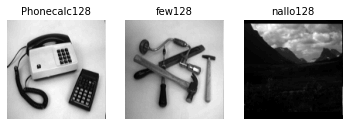

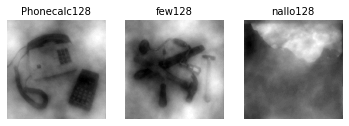

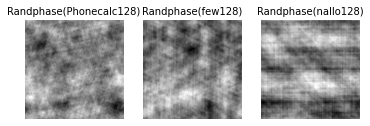

In [11]:
#%%  1.8 Information in Fourier phase and magnitude

#Image Manipulation
# Images phonecalc128, few128, nallo128
img1=np.load("/content/phonecalc128.npy")
img2=np.load("/content/few128.npy")
img3=np.load("/content/nallo128.npy")

k=plt.figure()
k.subplots_adjust(wspace=0.2, hspace=0.4)
plt.rc('axes',titlesize=10)

a1=k.add_subplot(1,3,1)
showgrey((img1),False)
a1.title.set_text("Phonecalc128")

a2=k.add_subplot(1,3,2)
showgrey((img2),False)
a2.title.set_text("few128")

a3=k.add_subplot(1,3,3)
showgrey((img3),False)
a3.title.set_text("nallo128")

# Preserving the phase information and replacing the magnitude 
# by a power spectrum of the form |Fourier|^2 \sim 1/(a + |omega|^2)
a=1e-3

f=plt.figure()
f.subplots_adjust(wspace=0.2, hspace=0.4)
plt.rc('axes',titlesize=10)

a1=f.add_subplot(1,3,1)
showgrey(pow2image(img1, a),False)
a1.title.set_text("Phonecalc128")

a2=f.add_subplot(1,3,2)
showgrey(pow2image(img2, a),False)
a2.title.set_text("few128")

a3=f.add_subplot(1,3,3)
showgrey(pow2image(img3, a),False)
a3.title.set_text("nallo128")


# To keep magnitude of the Fourier Transform, but replaces the
# phase information with a random distribution
g=plt.figure()
g.subplots_adjust(wspace=0.2, hspace=0.4)
plt.rc('axes',titlesize=10)

a1=g.add_subplot(1,3,1)
showgrey(randphaseimage(img1),False)
a1.title.set_text("Randphase(Phonecalc128)")

a2=g.add_subplot(1,3,2)
showgrey(randphaseimage(img2),False)
a2.title.set_text("Randphase(few128)")

a3=g.add_subplot(1,3,3)
showgrey(randphaseimage(img3),False)
a3.title.set_text("Randphase(nallo128)")

# **2.0 Gaussian Convolution implemented via FFT**

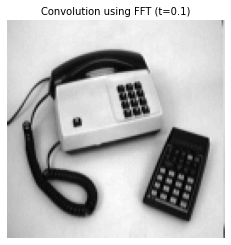

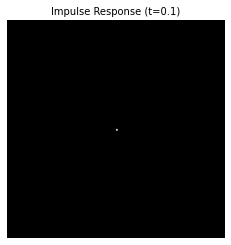

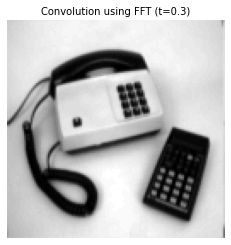

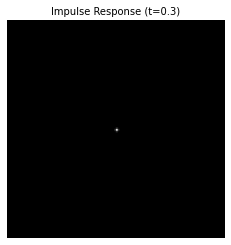

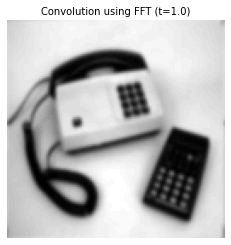

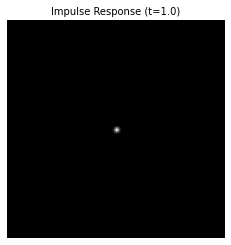

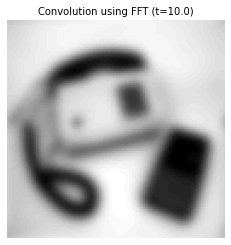

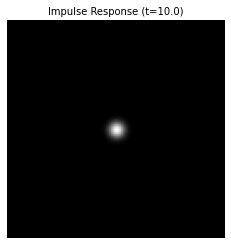

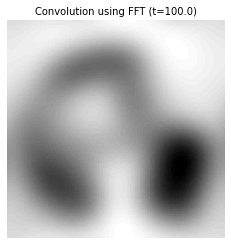

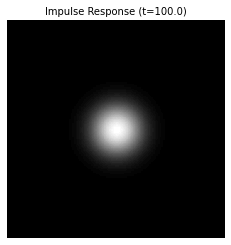

t=0.1
[[0.0133 0.    ]
 [0.     0.0133]]
t=0.3
[[0.28105 0.     ]
 [0.      0.28105]]
t=1.0
[[1. 0.]
 [0. 1.]]
t=10.0
[[10. -0.]
 [-0. 10.]]
t=100.0
[[100.  -0.]
 [ -0. 100.]]
 
(128, 128) (128, 128) (128, 128)
(128, 128) (128, 128) (128, 128)
(128, 128) (128, 128) (128, 128)
(128, 128) (128, 128) (128, 128)
(128, 128) (128, 128) (128, 128)
Difference between Variances for t=0.1
[[0.0867 0.    ]
 [0.     0.0867]]
Difference between Variances for t=0.3
[[ 0.01895 -0.     ]
 [-0.       0.01895]]
Difference between Variances for t=1.0
[[0. 0.]
 [0. 0.]]
Difference between Variances for t=10.0
[[0. 0.]
 [0. 0.]]
Difference between Variances for t=100.0
[[0. 0.]
 [0. 0.]]


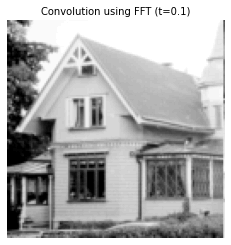

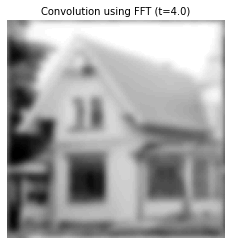

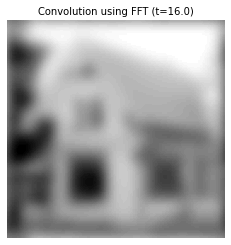

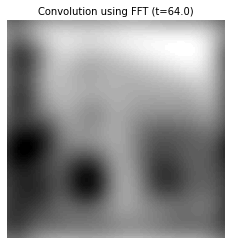

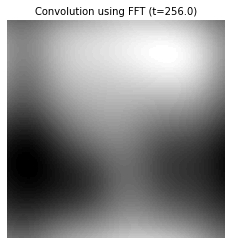

In [19]:
#%%  2.0 Gaussian Convolution implemented via FFT
img1=np.load("/content/phonecalc128.npy")
t=[0.1,0.3,1.0,10.0,100.0]

def gaussfft(img1,tt): 
    # using fast fourier transform to convolve image with t
    [xdim, ydim] = np.shape(img1)
    a = np.arange(-xdim/2,(xdim/2))
    b = np.arange(-ydim/2, (ydim/2))
    [x, y] = np.meshgrid(a,b)
    Gaussian_Kernel = (1/(2*np.pi*tt))*np.exp(-(x**2+y**2)/(2*tt))
    ft_img=fft2(img1)
    ft_kernel=fft2(Gaussian_Kernel)
    #FT=convolve2d(ft_img,ft_kernel,mode="same")
    FT=ft_img*ft_kernel
    inv_FT=ifft2(FT)
    return inv_FT 


plt.title("Convolution using FFT (t=0.1)")
showgrey(fftshift(gaussfft(img1,t[0])))
# Proposed Test Procedure
plt.title("Impulse Response (t=0.1)")
psf=gaussfft(deltafcn(128,128), t[0]) 
showgrey(fftshift(psf))

plt.title("Convolution using FFT (t=0.3)")
showgrey(fftshift(gaussfft(img1,t[1])))
# Proposed Test Procedure
plt.title("Impulse Response (t=0.3)")
psf1=gaussfft(deltafcn(128,128), t[1]) 
showgrey(fftshift(psf1))

plt.title("Convolution using FFT (t=1.0)")
showgrey(fftshift(gaussfft(img1,t[2])))
# Proposed Test Procedure
plt.title("Impulse Response (t=1.0)")
psf2=gaussfft(deltafcn(128,128), t[2]) 
showgrey(fftshift(psf2))

plt.title("Convolution using FFT (t=10.0)")
showgrey(fftshift(gaussfft(img1,t[3])))
# Proposed Test Procedure
plt.title("Impulse Response (t=10.0)")
psf3=gaussfft(deltafcn(128,128), t[3]) 
showgrey(fftshift(psf3))

plt.title("Convolution using FFT (t=100.0)")
showgrey(fftshift(gaussfft(img1,t[4])))
# Proposed Test Procedure
plt.title("Impulse Response (t=100.0)")
psf4=gaussfft(deltafcn(128,128), t[4]) 
showgrey(fftshift(psf4))

psf=gaussfft(deltafcn(128,128), t[0])
psf1=gaussfft(deltafcn(128,128), t[1])
psf2=gaussfft(deltafcn(128,128), t[2])
psf3=gaussfft(deltafcn(128,128), t[3])
psf4=gaussfft(deltafcn(128,128), t[4]) 
# Spatial Covariance matrix of the Gaussian function
print("t=0.1")
print(np.round(variance(fftshift(psf)),5))
print("t=0.3") 
print(np.round(variance(fftshift(psf1)),5))
print("t=1.0")
print(np.round(variance(fftshift(psf2)),5))
print("t=10.0")
print(np.round(variance(fftshift(psf3)),5))
print("t=100.0")
print(np.round(variance(fftshift(psf4)),5))
print(" ")

a=np.round(variance(discgaussfft((deltafcn(128,128)),t[0])),5)
b=np.round(variance(discgaussfft((deltafcn(128,128)),t[1])),5)
c=np.round(variance(discgaussfft((deltafcn(128,128)),t[2])),5)
d=np.round(variance(discgaussfft((deltafcn(128,128)),t[3])),5)
e=np.round(variance(discgaussfft((deltafcn(128,128)),t[4])),5)

print("Difference between Variances for t=0.1")
print(a-np.round(variance(fftshift(psf)),5))
print("Difference between Variances for t=0.3")
print(b-np.round(variance(fftshift(psf1)),5))
print("Difference between Variances for t=1.0")
print(c-np.round(variance(fftshift(psf2)),5))
print("Difference between Variances for t=10.0")
print(d-np.round(variance(fftshift(psf3)),5))
print("Difference between Variances for t=100.0")
print(e-np.round(variance(fftshift(psf4)),5))

img2=np.load("/content/godthem128.npy")
tc=[0.1,4.0,16.0,64.0,256.0]

plt.title("Convolution using FFT (t=0.1)")
showgrey(fftshift(gaussfft(img2,tc[0])))
plt.title("Convolution using FFT (t=4.0)")
showgrey(fftshift(gaussfft(img2,tc[1])))
plt.title("Convolution using FFT (t=16.0)")
showgrey(fftshift(gaussfft(img2,tc[2])))
plt.title("Convolution using FFT (t=64.0)")
showgrey(fftshift(gaussfft(img2,tc[3])))
plt.title("Convolution using FFT (t=256.0)")
showgrey(fftshift(gaussfft(img2,tc[4])))

# **3. Smoothing**

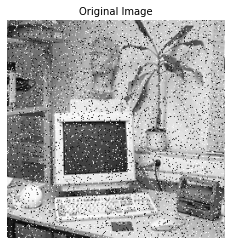

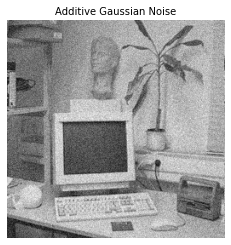

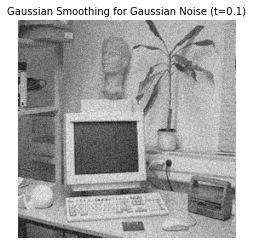

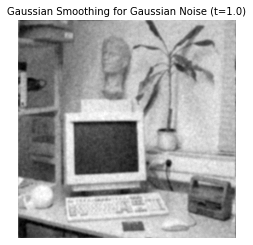

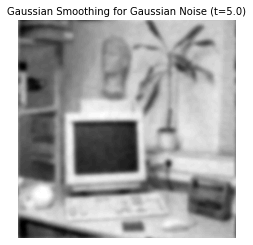

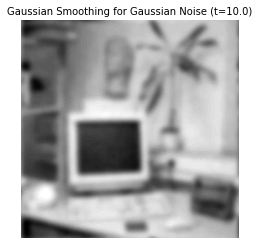

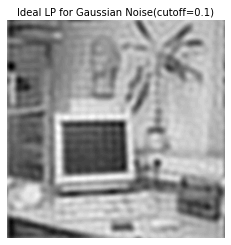

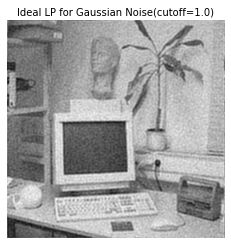

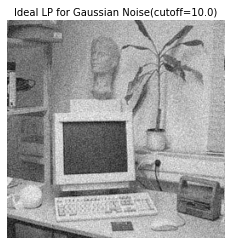

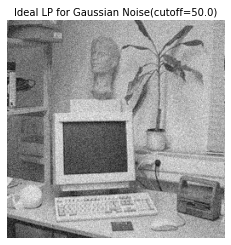

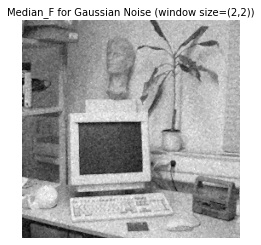

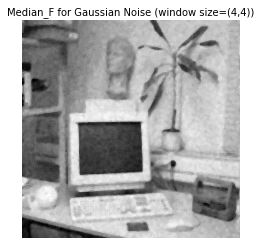

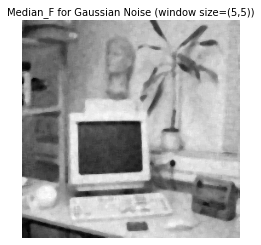

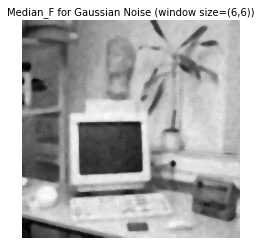

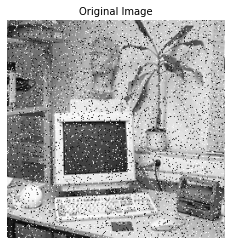

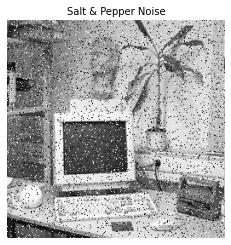

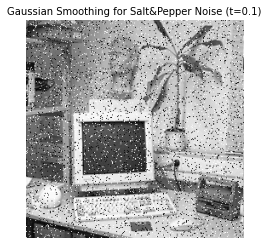

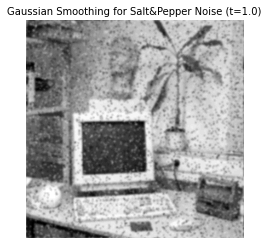

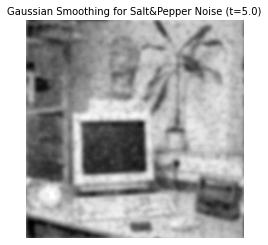

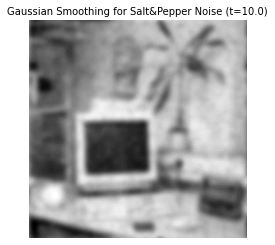

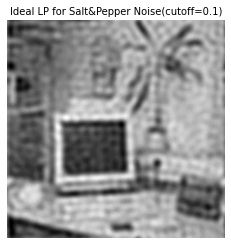

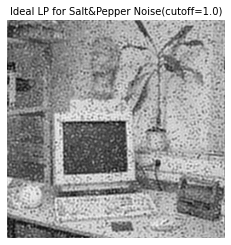

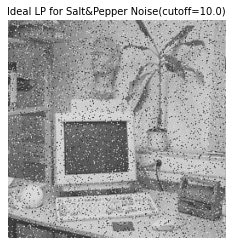

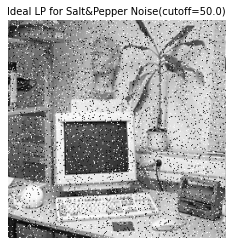

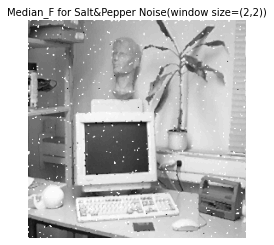

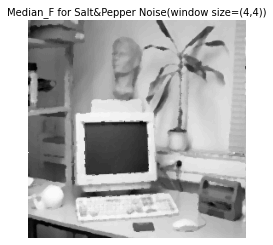

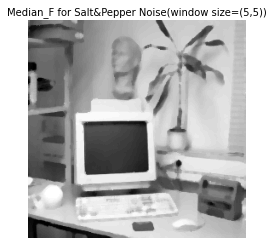

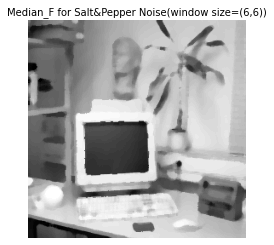

In [18]:
# 3. Smoothing
office=np.load("/content/office256.npy")
add=gaussnoise(office, 16)
sap=sapnoise(office, 0.1,256)

def gaussfft(img1,tt): 
    # using fast fourier transform to convolve image with t
    [xdim, ydim] = np.shape(img1)
    a = np.arange(-xdim/2,(xdim/2))
    b = np.arange(-ydim/2, (ydim/2))
    [x, y] = np.meshgrid(a,b)
    Gaussian_Kernel = (1/(2*np.pi*tt))*np.exp(-(x**2+y**2)/(2*tt))
    ft_img=fft2(img1)
    ft_kernel=fft2(Gaussian_Kernel)
    #FT=convolve2d(ft_img,ft_kernel,mode="same")
    FT=ft_img*ft_kernel
    inv_FT=ifft2(FT)
    return inv_FT 

plt.title("Original Image")
showgrey(office) 
plt.title("Additive Gaussian Noise")
showgrey(add) # Gaussian Noise
plt.title("Gaussian Smoothing for Gaussian Noise (t=0.1)")
showgrey(fftshift(gaussfft(add,0.1))) #Gaussian Smoothing on Gaussian Noise
plt.title("Gaussian Smoothing for Gaussian Noise (t=1.0)")
showgrey(fftshift(gaussfft(add,1.0)))
plt.title("Gaussian Smoothing for Gaussian Noise (t=5.0)")
showgrey(fftshift(gaussfft(add,5.0)))
plt.title("Gaussian Smoothing for Gaussian Noise (t=10.0)")
showgrey(fftshift(gaussfft(add,10.0)))

plt.title("Ideal LP for Gaussian Noise(cutoff=0.1)")
showgrey(ideal(add, cutoff=0.1, ftype = 'l')) #Ideal LowPass Filtering for Gaussian Noise
plt.title("Ideal LP for Gaussian Noise(cutoff=1.0)")
showgrey(ideal(add, cutoff=0.3, ftype = 'l')) #Ideal LowPass Filtering for Gaussian Noise
plt.title("Ideal LP for Gaussian Noise(cutoff=10.0)")
showgrey(ideal(add, cutoff=0.5, ftype = 'l')) #Ideal LowPass Filtering for Gaussian Noise
plt.title("Ideal LP for Gaussian Noise(cutoff=50.0)")
showgrey(ideal(add, cutoff=1.0, ftype = 'l')) #Ideal LowPass Filtering for Gaussian Noise


plt.title("Median_F for Gaussian Noise (window size=(2,2))")
showgrey(medfilt(add,2,2)) #Median Filtering on Gausssian Noise
plt.title("Median_F for Gaussian Noise (window size=(4,4))")
showgrey(medfilt(add,4,4))
plt.title("Median_F for Gaussian Noise (window size=(5,5))")
showgrey(medfilt(add,5,5))
plt.title("Median_F for Gaussian Noise (window size=(6,6))")
showgrey(medfilt(add,6,6))


plt.title("Original Image")
showgrey(office) 
plt.title("Salt & Pepper Noise")
showgrey(sap) # Salt&Pepper Noise
plt.title("Gaussian Smoothing for Salt&Pepper Noise (t=0.1)")
showgrey(fftshift(gaussfft(sap,0.1))) #Gaussian Smoothing on Salt&Pepper Noise
plt.title("Gaussian Smoothing for Salt&Pepper Noise (t=1.0)")
showgrey(fftshift(gaussfft(sap,1.0)))
plt.title("Gaussian Smoothing for Salt&Pepper Noise (t=5.0)")
showgrey(fftshift(gaussfft(sap,5.0)))
plt.title("Gaussian Smoothing for Salt&Pepper Noise (t=10.0)")
showgrey(fftshift(gaussfft(sap,10.0)))

plt.title("Ideal LP for Salt&Pepper Noise(cutoff=0.1)")
showgrey(ideal(sap, cutoff=0.1, ftype = 'l')) #Ideal LowPass Filtering for Salt&Pepper Noise
plt.title("Ideal LP for Salt&Pepper Noise(cutoff=1.0)")
showgrey(ideal(sap, cutoff=0.3, ftype = 'l')) #Ideal LowPass Filtering for Salt&Pepper Noise
plt.title("Ideal LP for Salt&Pepper Noise(cutoff=10.0)")
showgrey(ideal(sap, cutoff=0.5, ftype = 'l')) #Ideal LowPass Filtering for Salt&Pepper Noise
plt.title("Ideal LP for Salt&Pepper Noise(cutoff=50.0)")
showgrey(ideal(sap, cutoff=1.0, ftype = 'l')) #Ideal LowPass Filtering for Salt&Pepper Noise


plt.title("Median_F for Salt&Pepper Noise(window size=(2,2))")
showgrey(medfilt(sap,2,2)) #Median Filtering on Salt&Pepper Noise
plt.title("Median_F for Salt&Pepper Noise(window size=(4,4))")
showgrey(medfilt(sap,4,4))
plt.title("Median_F for Salt&Pepper Noise(window size=(5,5))")
showgrey(medfilt(sap,5,5))
plt.title("Median_F for Salt&Pepper Noise(window size=(6,6))")
showgrey(medfilt(sap,6,6))

# **3.2 Smoothing & Subsampling**

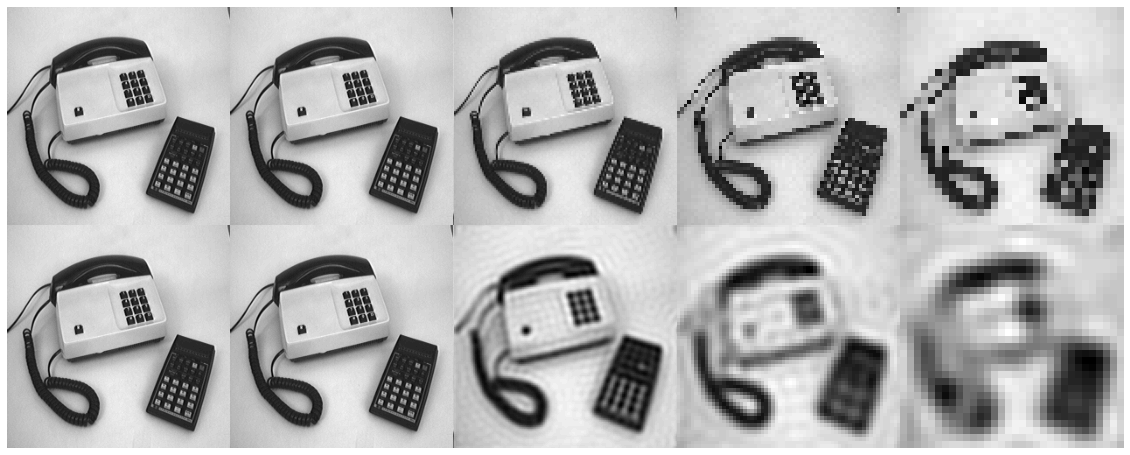

In [16]:
#%% 3.2 Smoothing & Subsampling
img=np.load("/content/phonecalc256.npy")
smoothing=img

N=5
f=plt.figure(figsize=(20,20))
#f.suptitle("Gaussian Smoothing Filter", fontsize=50)
f.subplots_adjust(wspace=0,hspace=-0.75)
for i in range(N):
    if (i>1): 
        img=rawsubsample(img) #Generate subsampled versions
        smoothing=ideal(smoothing, cutoff=0.1, ftype = 'l')
        #smoothing=fftshift(gaussfft(smoothing,10.0))
        smoothing=rawsubsample(smoothing)
        
    f.add_subplot(2,N,i+1)
    showgrey(img,False)
    f.add_subplot(2,N,i+1+N)
    showgrey(smoothing,False) 

plt.show()

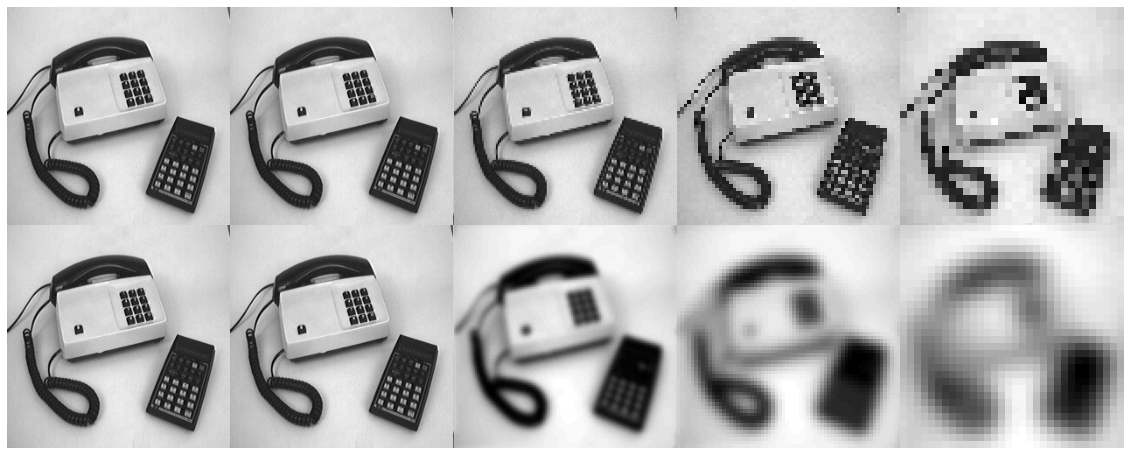

In [17]:
img=np.load("/content/phonecalc256.npy")
smoothing=img

N=5
f=plt.figure(figsize=(20,20))
#f.suptitle("Gaussian Smoothing Filter", fontsize=50)
f.subplots_adjust(wspace=0,hspace=-0.75)
for i in range(N):
    if (i>1): 
        img=rawsubsample(img) #Generate subsampled versions
        #smoothing=ideal(smoothing, cutoff=0.1, ftype = 'l')
        smoothing=fftshift(gaussfft(smoothing,10.0))
        smoothing=rawsubsample(smoothing)
        
    f.add_subplot(2,N,i+1)
    showgrey(img,False)
    f.add_subplot(2,N,i+1+N)
    showgrey(smoothing,False) 

plt.show()